In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_19 = pd.read_csv('data_for_wr2019.csv')
df_19

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1,11/02/2019 12:12:20 AM,11/02/2019 12:31:54 AM,1,6.60,1,N,164,33,1,21.5,3.0,0.5,5.05,0.0,0.3,30.35,2.5
1,1,1,11/02/2019 12:42:19 AM,11/02/2019 12:45:38 AM,1,0.60,1,N,148,148,1,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
2,2,1,11/02/2019 12:56:01 AM,11/02/2019 01:04:13 AM,2,1.80,1,N,4,170,1,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5
3,3,1,11/02/2019 12:15:25 AM,11/02/2019 12:25:33 AM,2,2.00,1,N,113,113,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,0.0
4,4,1,11/02/2019 12:27:17 AM,11/02/2019 12:33:13 AM,4,1.00,1,N,113,113,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,1,11/19/2019 05:33:08 AM,11/19/2019 05:47:10 AM,1,4.40,1,N,193,107,2,14.5,3.0,0.5,0.00,0.0,0.3,18.30,2.5
3999996,3999996,1,11/19/2019 05:50:56 AM,11/19/2019 05:57:27 AM,1,1.70,1,N,137,148,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5
3999997,3999997,1,11/19/2019 05:54:04 AM,11/19/2019 06:02:03 AM,1,2.40,1,N,143,161,1,9.0,3.0,0.5,2.55,0.0,0.3,15.35,2.5
3999998,3999998,2,11/19/2019 05:14:12 AM,11/19/2019 05:29:18 AM,1,6.36,1,N,224,25,2,20.0,0.5,0.5,0.00,0.0,0.3,23.80,2.5


In [3]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        int64  
 5   trip_distance          float64
 6   RatecodeID             int64  
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
dtypes: float64(9), int64(7), object(3)
memory usage: 579.8+ MB


In [4]:
df_19['tpep_pickup_datetime'] = pd.to_datetime(df_19['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df_19['tpep_dropoff_datetime'] = pd.to_datetime(df_19['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df_19

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1,2019-11-02 00:12:20,2019-11-02 00:31:54,1,6.60,1,N,164,33,1,21.5,3.0,0.5,5.05,0.0,0.3,30.35,2.5
1,1,1,2019-11-02 00:42:19,2019-11-02 00:45:38,1,0.60,1,N,148,148,1,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
2,2,1,2019-11-02 00:56:01,2019-11-02 01:04:13,2,1.80,1,N,4,170,1,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5
3,3,1,2019-11-02 00:15:25,2019-11-02 00:25:33,2,2.00,1,N,113,113,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,0.0
4,4,1,2019-11-02 00:27:17,2019-11-02 00:33:13,4,1.00,1,N,113,113,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,1,2019-11-19 05:33:08,2019-11-19 05:47:10,1,4.40,1,N,193,107,2,14.5,3.0,0.5,0.00,0.0,0.3,18.30,2.5
3999996,3999996,1,2019-11-19 05:50:56,2019-11-19 05:57:27,1,1.70,1,N,137,148,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5
3999997,3999997,1,2019-11-19 05:54:04,2019-11-19 06:02:03,1,2.40,1,N,143,161,1,9.0,3.0,0.5,2.55,0.0,0.3,15.35,2.5
3999998,3999998,2,2019-11-19 05:14:12,2019-11-19 05:29:18,1,6.36,1,N,224,25,2,20.0,0.5,0.5,0.00,0.0,0.3,23.80,2.5


In [5]:
df_20 = pd.read_csv('data_for_wr2020.csv')
df_20

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,2.0,01/21/2020 10:29:41 AM,01/21/2020 10:44:02 AM,1.0,1.81,1.0,N,238,236,2.0,10.5,0.0,0.5,0.00,0.0,0.3,13.80,2.5
3999996,3999996,2.0,01/21/2020 10:09:02 AM,01/21/2020 10:35:14 AM,1.0,5.30,1.0,N,13,163,1.0,21.5,0.0,0.5,4.96,0.0,0.3,29.76,2.5
3999997,3999997,2.0,01/21/2020 10:40:37 AM,01/21/2020 10:49:40 AM,1.0,1.42,1.0,N,163,237,1.0,7.5,0.0,0.5,1.62,0.0,0.3,12.42,2.5
3999998,3999998,1.0,01/21/2020 10:23:50 AM,01/21/2020 10:27:02 AM,1.0,0.60,1.0,N,263,141,1.0,4.0,2.5,0.5,1.00,0.0,0.3,8.30,2.5


In [6]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               float64
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           float64
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
dtypes: float64(13), int64(3), object(3)
memory usage: 579.8+ MB


In [7]:
df_20['tpep_pickup_datetime'] = pd.to_datetime(df_20['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df_20['tpep_dropoff_datetime'] = pd.to_datetime(df_20['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df_20

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,2.0,2020-01-21 10:29:41,2020-01-21 10:44:02,1.0,1.81,1.0,N,238,236,2.0,10.5,0.0,0.5,0.00,0.0,0.3,13.80,2.5
3999996,3999996,2.0,2020-01-21 10:09:02,2020-01-21 10:35:14,1.0,5.30,1.0,N,13,163,1.0,21.5,0.0,0.5,4.96,0.0,0.3,29.76,2.5
3999997,3999997,2.0,2020-01-21 10:40:37,2020-01-21 10:49:40,1.0,1.42,1.0,N,163,237,1.0,7.5,0.0,0.5,1.62,0.0,0.3,12.42,2.5
3999998,3999998,1.0,2020-01-21 10:23:50,2020-01-21 10:27:02,1.0,0.60,1.0,N,263,141,1.0,4.0,2.5,0.5,1.00,0.0,0.3,8.30,2.5


In [8]:
df_21 = pd.read_csv('data_for_wr2021.csv')
df_21

C:\Users\Тася\AppData\Local\Temp\ipykernel_15644\1268771394.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_21 = pd.read_csv('data_for_wr2021.csv')


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,01/01/2021 12:30:10 AM,01/01/2021 12:36:12 AM,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1,1.0,01/01/2021 12:51:20 AM,01/01/2021 12:52:19 AM,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,2,1.0,01/01/2021 12:43:30 AM,01/01/2021 01:11:06 AM,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,3,1.0,01/01/2021 12:15:48 AM,01/01/2021 12:31:01 AM,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,4,2.0,01/01/2021 12:31:49 AM,01/01/2021 12:48:21 AM,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,2.0,03/22/2021 11:29:29 PM,03/23/2021 12:00:32 AM,2.0,14.05,1.0,N,248,166,1.0,41.0,0.5,0.5,0.00,2.8,0.3,45.10,0.0
3999996,3999996,2.0,03/22/2021 11:43:42 PM,03/22/2021 11:46:18 PM,2.0,0.03,1.0,N,148,148,2.0,3.5,0.5,0.5,0.00,0.0,0.3,7.30,2.5
3999997,3999997,2.0,03/22/2021 11:16:27 PM,03/22/2021 11:23:41 PM,1.0,1.46,1.0,N,41,75,1.0,7.5,0.5,0.5,2.00,0.0,0.3,10.80,0.0
3999998,3999998,2.0,03/22/2021 11:33:23 PM,03/22/2021 11:46:24 PM,1.0,3.13,1.0,N,236,186,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5


In [9]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               float64
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           float64
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
dtypes: float64(13), int64(3), object(3)
memory usage: 579.8+ MB


In [10]:
df_21['tpep_pickup_datetime'] = pd.to_datetime(df_21['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df_21['tpep_dropoff_datetime'] = pd.to_datetime(df_21['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df_21

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,2.0,2021-03-22 23:29:29,2021-03-23 00:00:32,2.0,14.05,1.0,N,248,166,1.0,41.0,0.5,0.5,0.00,2.8,0.3,45.10,0.0
3999996,3999996,2.0,2021-03-22 23:43:42,2021-03-22 23:46:18,2.0,0.03,1.0,N,148,148,2.0,3.5,0.5,0.5,0.00,0.0,0.3,7.30,2.5
3999997,3999997,2.0,2021-03-22 23:16:27,2021-03-22 23:23:41,1.0,1.46,1.0,N,41,75,1.0,7.5,0.5,0.5,2.00,0.0,0.3,10.80,0.0
3999998,3999998,2.0,2021-03-22 23:33:23,2021-03-22 23:46:24,1.0,3.13,1.0,N,236,186,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5


In [11]:
df = pd.concat([
    df_19,
    df_20,
    df_21
])
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,2019-11-02 00:12:20,2019-11-02 00:31:54,1.0,6.60,1.0,N,164,33,1.0,21.5,3.0,0.5,5.05,0.0,0.3,30.35,2.5
1,1,1.0,2019-11-02 00:42:19,2019-11-02 00:45:38,1.0,0.60,1.0,N,148,148,1.0,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
2,2,1.0,2019-11-02 00:56:01,2019-11-02 01:04:13,2.0,1.80,1.0,N,4,170,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5
3,3,1.0,2019-11-02 00:15:25,2019-11-02 00:25:33,2.0,2.00,1.0,N,113,113,1.0,9.0,0.5,0.5,2.05,0.0,0.3,12.35,0.0
4,4,1.0,2019-11-02 00:27:17,2019-11-02 00:33:13,4.0,1.00,1.0,N,113,113,2.0,6.0,0.5,0.5,0.00,0.0,0.3,7.30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,2.0,2021-03-22 23:29:29,2021-03-23 00:00:32,2.0,14.05,1.0,N,248,166,1.0,41.0,0.5,0.5,0.00,2.8,0.3,45.10,0.0
3999996,3999996,2.0,2021-03-22 23:43:42,2021-03-22 23:46:18,2.0,0.03,1.0,N,148,148,2.0,3.5,0.5,0.5,0.00,0.0,0.3,7.30,2.5
3999997,3999997,2.0,2021-03-22 23:16:27,2021-03-22 23:23:41,1.0,1.46,1.0,N,41,75,1.0,7.5,0.5,0.5,2.00,0.0,0.3,10.80,0.0
3999998,3999998,2.0,2021-03-22 23:33:23,2021-03-22 23:46:24,1.0,3.13,1.0,N,236,186,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5


In [12]:
df['year'] = df['tpep_pickup_datetime'].dt.year
df['month'] = df['tpep_pickup_datetime'].dt.month
df['day'] = df['tpep_pickup_datetime'].dt.day
df['trip_time']  = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)
df


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day,trip_time
0,0,1.0,1.0,6.60,1.0,N,164,33,1.0,21.5,...,0.5,5.05,0.0,0.3,30.35,2.5,2019,11,2,19.566667
1,1,1.0,1.0,0.60,1.0,N,148,148,1.0,4.5,...,0.5,1.65,0.0,0.3,9.95,2.5,2019,11,2,3.316667
2,2,1.0,2.0,1.80,1.0,N,4,170,1.0,8.0,...,0.5,2.35,0.0,0.3,14.15,2.5,2019,11,2,8.200000
3,3,1.0,2.0,2.00,1.0,N,113,113,1.0,9.0,...,0.5,2.05,0.0,0.3,12.35,0.0,2019,11,2,10.133333
4,4,1.0,4.0,1.00,1.0,N,113,113,2.0,6.0,...,0.5,0.00,0.0,0.3,7.30,0.0,2019,11,2,5.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,2.0,2.0,14.05,1.0,N,248,166,1.0,41.0,...,0.5,0.00,2.8,0.3,45.10,0.0,2021,3,22,31.050000
3999996,3999996,2.0,2.0,0.03,1.0,N,148,148,2.0,3.5,...,0.5,0.00,0.0,0.3,7.30,2.5,2021,3,22,2.600000
3999997,3999997,2.0,1.0,1.46,1.0,N,41,75,1.0,7.5,...,0.5,2.00,0.0,0.3,10.80,0.0,2021,3,22,7.233333
3999998,3999998,2.0,1.0,3.13,1.0,N,236,186,1.0,13.0,...,0.5,3.36,0.0,0.3,20.16,2.5,2021,3,22,13.016667


In [13]:
df['year'].unique()

array([2019, 2009, 2008, 2020, 2003, 2015, 2021])

In [14]:
df = df.loc[df['year'].isin([2019, 2020, 2021])]
df

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day,trip_time
0,0,1.0,1.0,6.60,1.0,N,164,33,1.0,21.5,...,0.5,5.05,0.0,0.3,30.35,2.5,2019,11,2,19.566667
1,1,1.0,1.0,0.60,1.0,N,148,148,1.0,4.5,...,0.5,1.65,0.0,0.3,9.95,2.5,2019,11,2,3.316667
2,2,1.0,2.0,1.80,1.0,N,4,170,1.0,8.0,...,0.5,2.35,0.0,0.3,14.15,2.5,2019,11,2,8.200000
3,3,1.0,2.0,2.00,1.0,N,113,113,1.0,9.0,...,0.5,2.05,0.0,0.3,12.35,0.0,2019,11,2,10.133333
4,4,1.0,4.0,1.00,1.0,N,113,113,2.0,6.0,...,0.5,0.00,0.0,0.3,7.30,0.0,2019,11,2,5.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,2.0,2.0,14.05,1.0,N,248,166,1.0,41.0,...,0.5,0.00,2.8,0.3,45.10,0.0,2021,3,22,31.050000
3999996,3999996,2.0,2.0,0.03,1.0,N,148,148,2.0,3.5,...,0.5,0.00,0.0,0.3,7.30,2.5,2021,3,22,2.600000
3999997,3999997,2.0,1.0,1.46,1.0,N,41,75,1.0,7.5,...,0.5,2.00,0.0,0.3,10.80,0.0,2021,3,22,7.233333
3999998,3999998,2.0,1.0,3.13,1.0,N,236,186,1.0,13.0,...,0.5,3.36,0.0,0.3,20.16,2.5,2021,3,22,13.016667


In [15]:
df['month'].unique()

array([11, 10, 12,  1,  2,  3,  4,  5,  6,  7])

In [16]:
# Пример пропорциональной выборки: сохраняем 50% от каждого месяца
balanced_df = (
    df.groupby('month', group_keys=False)
    .apply(lambda x: x.sample(frac=0.5, random_state=42))
)
balanced_df

C:\Users\Тася\AppData\Local\Temp\ipykernel_15644\3549149002.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.5, random_state=42))


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day,trip_time
1403068,1403068,1.0,1.0,2.30,1.0,N,263,74,1.0,8.5,...,0.5,1.85,0.0,0.3,14.15,2.5,2020,1,8,6.866667
888333,888333,1.0,1.0,1.30,1.0,N,140,162,1.0,7.5,...,0.5,2.15,0.0,0.3,12.95,2.5,2020,1,6,8.383333
451187,451187,1.0,0.0,1.20,1.0,N,163,141,1.0,6.0,...,0.5,1.95,0.0,0.3,11.75,2.5,2021,1,12,4.700000
2829057,2829057,2.0,2.0,1.04,1.0,N,237,161,1.0,7.5,...,0.5,1.00,0.0,0.3,11.80,2.5,2020,1,15,9.283333
3834948,3834948,1.0,2.0,1.80,1.0,Y,236,161,2.0,9.0,...,0.5,0.00,0.0,0.3,12.30,2.5,2020,1,20,10.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,3476,2.0,1.0,7.08,1.0,N,42,137,2.0,21.0,...,0.5,0.00,0.0,0.3,24.80,2.5,2020,12,31,12.450000
3011096,3011096,2.0,1.0,2.83,1.0,N,234,237,1.0,13.0,...,0.5,3.36,0.0,0.3,20.16,2.5,2019,12,26,16.283333
2320356,2320356,2.0,1.0,1.42,1.0,N,140,233,1.0,8.0,...,0.5,2.26,0.0,0.3,13.56,2.5,2019,12,3,10.733333
637,637,2.0,1.0,2.61,1.0,N,90,229,1.0,10.0,...,0.5,2.76,0.0,0.3,16.56,2.5,2020,12,31,1390.600000


In [17]:
balanced_df['month'].value_counts()

month
1     2680414
11    1999902
2      685852
3      629254
7        4393
12        111
10         24
5           6
4           4
6           2
Name: count, dtype: int64

In [18]:
balanced_df.isnull().sum()

Unnamed: 0                    0
VendorID                 102728
passenger_count          102728
trip_distance                 0
RatecodeID               102728
store_and_fwd_flag       102728
PULocationID                  0
DOLocationID                  0
payment_type             102728
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          2
year                          0
month                         0
day                           0
trip_time                     0
dtype: int64

In [19]:
balanced_df.dropna(inplace=True)
balanced_df

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day,trip_time
1403068,1403068,1.0,1.0,2.30,1.0,N,263,74,1.0,8.5,...,0.5,1.85,0.0,0.3,14.15,2.5,2020,1,8,6.866667
888333,888333,1.0,1.0,1.30,1.0,N,140,162,1.0,7.5,...,0.5,2.15,0.0,0.3,12.95,2.5,2020,1,6,8.383333
451187,451187,1.0,0.0,1.20,1.0,N,163,141,1.0,6.0,...,0.5,1.95,0.0,0.3,11.75,2.5,2021,1,12,4.700000
2829057,2829057,2.0,2.0,1.04,1.0,N,237,161,1.0,7.5,...,0.5,1.00,0.0,0.3,11.80,2.5,2020,1,15,9.283333
3834948,3834948,1.0,2.0,1.80,1.0,Y,236,161,2.0,9.0,...,0.5,0.00,0.0,0.3,12.30,2.5,2020,1,20,10.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,3476,2.0,1.0,7.08,1.0,N,42,137,2.0,21.0,...,0.5,0.00,0.0,0.3,24.80,2.5,2020,12,31,12.450000
3011096,3011096,2.0,1.0,2.83,1.0,N,234,237,1.0,13.0,...,0.5,3.36,0.0,0.3,20.16,2.5,2019,12,26,16.283333
2320356,2320356,2.0,1.0,1.42,1.0,N,140,233,1.0,8.0,...,0.5,2.26,0.0,0.3,13.56,2.5,2019,12,3,10.733333
637,637,2.0,1.0,2.61,1.0,N,90,229,1.0,10.0,...,0.5,2.76,0.0,0.3,16.56,2.5,2020,12,31,1390.600000


In [20]:
balanced_df.duplicated().sum()

0

In [21]:
num_col = balanced_df.select_dtypes(include='number').columns

def remove_outliers(frame, column):
    Q1 = frame[column].quantile(0.25)
    Q3 = frame[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
    return frame[(frame[column] >= lower_bound) & (frame[column] <= upper_bound)]

for col in num_col:
    balanced_df = remove_outliers(balanced_df, col)

balanced_df

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day,trip_time
1403068,1403068,1.0,1.0,2.30,1.0,N,263,74,1.0,8.5,...,0.5,1.85,0.0,0.3,14.15,2.5,2020,1,8,6.866667
888333,888333,1.0,1.0,1.30,1.0,N,140,162,1.0,7.5,...,0.5,2.15,0.0,0.3,12.95,2.5,2020,1,6,8.383333
451187,451187,1.0,0.0,1.20,1.0,N,163,141,1.0,6.0,...,0.5,1.95,0.0,0.3,11.75,2.5,2021,1,12,4.700000
2829057,2829057,2.0,2.0,1.04,1.0,N,237,161,1.0,7.5,...,0.5,1.00,0.0,0.3,11.80,2.5,2020,1,15,9.283333
3834948,3834948,1.0,2.0,1.80,1.0,Y,236,161,2.0,9.0,...,0.5,0.00,0.0,0.3,12.30,2.5,2020,1,20,10.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303354,303354,2.0,1.0,0.93,1.0,N,161,163,1.0,9.0,...,0.5,3.69,0.0,0.3,15.99,2.5,2019,12,15,12.850000
312003,312003,2.0,1.0,1.18,1.0,N,230,162,1.0,12.5,...,0.5,3.16,0.0,0.3,18.96,2.5,2019,12,15,18.783333
2908448,2908448,2.0,1.0,0.99,1.0,N,262,140,1.0,7.0,...,0.5,2.00,0.0,0.3,12.30,2.5,2019,12,5,8.966667
3011096,3011096,2.0,1.0,2.83,1.0,N,234,237,1.0,13.0,...,0.5,3.36,0.0,0.3,20.16,2.5,2019,12,26,16.283333


In [22]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
balanced_df['store_and_fwd_flag'] = encoder.fit_transform(balanced_df[['store_and_fwd_flag']])
balanced_df

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day,trip_time
1403068,1403068,1.0,1.0,2.30,1.0,0.0,263,74,1.0,8.5,...,0.5,1.85,0.0,0.3,14.15,2.5,2020,1,8,6.866667
888333,888333,1.0,1.0,1.30,1.0,0.0,140,162,1.0,7.5,...,0.5,2.15,0.0,0.3,12.95,2.5,2020,1,6,8.383333
451187,451187,1.0,0.0,1.20,1.0,0.0,163,141,1.0,6.0,...,0.5,1.95,0.0,0.3,11.75,2.5,2021,1,12,4.700000
2829057,2829057,2.0,2.0,1.04,1.0,0.0,237,161,1.0,7.5,...,0.5,1.00,0.0,0.3,11.80,2.5,2020,1,15,9.283333
3834948,3834948,1.0,2.0,1.80,1.0,1.0,236,161,2.0,9.0,...,0.5,0.00,0.0,0.3,12.30,2.5,2020,1,20,10.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303354,303354,2.0,1.0,0.93,1.0,0.0,161,163,1.0,9.0,...,0.5,3.69,0.0,0.3,15.99,2.5,2019,12,15,12.850000
312003,312003,2.0,1.0,1.18,1.0,0.0,230,162,1.0,12.5,...,0.5,3.16,0.0,0.3,18.96,2.5,2019,12,15,18.783333
2908448,2908448,2.0,1.0,0.99,1.0,0.0,262,140,1.0,7.0,...,0.5,2.00,0.0,0.3,12.30,2.5,2019,12,5,8.966667
3011096,3011096,2.0,1.0,2.83,1.0,0.0,234,237,1.0,13.0,...,0.5,3.36,0.0,0.3,20.16,2.5,2019,12,26,16.283333


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_scale = ['passenger_count', 'trip_distance', 'payment_type', 'fare_amount', 
                    'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                    'improvement_surcharge', 'total_amount', 'congestion_surcharge',
                    'trip_time' ]
non_scaled_columns = list(set(balanced_df.columns) - set(columns_to_scale))

groups = balanced_df.groupby('year')
scaled_groups = {}

for name, group in groups:
    non_scaled_data = group[non_scaled_columns].reset_index(drop=True)
    scaled_data = StandardScaler().fit_transform(group[columns_to_scale])
    scaled_data_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
    combined_data = pd.concat([scaled_data_df, non_scaled_data], axis=1)
    scaled_groups[name] = combined_data

for name in scaled_groups:
    if 'Unnamed: 0' in scaled_groups[name].columns:
        scaled_groups[name] = scaled_groups[name].drop(columns='Unnamed: 0')

scaled_groups[2020]

,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_time,store_and_fwd_flag,RatecodeID,PULocationID,year,month,VendorID,day,DOLocationID
0,-0.424326,0.639903,-0.577487,-0.042092,1.446426,0.0,0.147806,0.0,8.326673e-16,0.057423,0.0,-0.578963,0.0,1.0,263,2020,1,1.0,8,74
1,-0.424326,-0.343578,-0.577487,-0.332665,1.047572,0.0,0.384565,0.0,8.326673e-16,-0.236973,0.0,-0.285792,0.0,1.0,140,2020,1,1.0,6,162
2,1.376467,-0.599284,-0.577487,-0.332665,-0.946695,0.0,-0.523010,0.0,8.326673e-16,-0.519102,0.0,-0.111823,0.0,1.0,237,2020,1,2.0,15,161
3,1.376467,0.148162,1.672434,0.103194,1.047572,0.0,-1.312206,0.0,8.326673e-16,-0.396437,0.0,0.036373,1.0,1.0,236,2020,1,1.0,20,161
4,-0.424326,-0.540275,-0.577487,-0.913810,1.446426,0.0,-0.523010,0.0,8.326673e-16,-0.887096,0.0,-1.129865,0.0,1.0,137,2020,1,1.0,10,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454474,-0.424326,-0.864824,-0.577487,-0.623237,-0.148988,0.0,2.633772,0.0,8.326673e-16,0.462217,0.0,-0.285792,0.0,1.0,100,2020,2,2.0,5,246
1454475,-0.424326,-1.189372,-0.577487,-0.913810,-0.148988,0.0,-0.523010,0.0,8.326673e-16,-0.764431,0.0,-0.827030,0.0,1.0,249,2020,3,2.0,18,158
1454476,-0.424326,0.797260,-0.577487,1.265484,-0.148988,0.0,-0.523010,0.0,8.326673e-16,1.075542,0.0,1.627870,0.0,1.0,68,2020,3,2.0,18,48
1454477,-0.424326,0.984121,-0.577487,1.701343,-0.946695,0.0,1.126409,0.0,8.326673e-16,1.710946,0.0,1.988695,0.0,1.0,68,2020,3,2.0,21,143


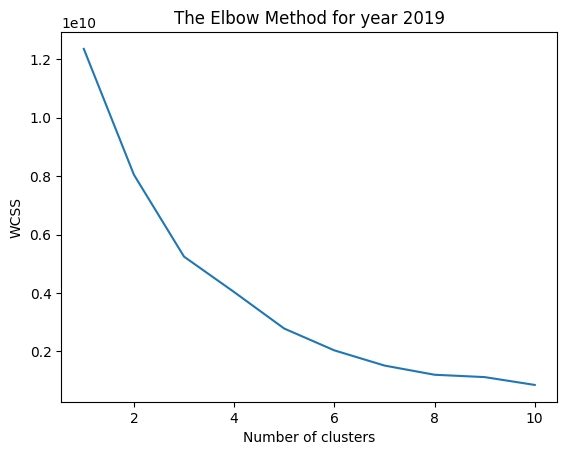

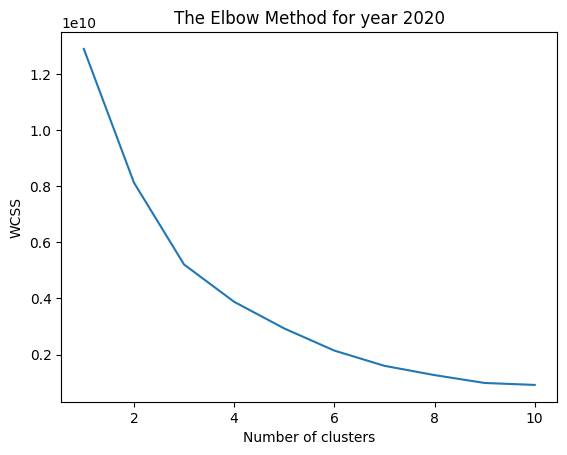

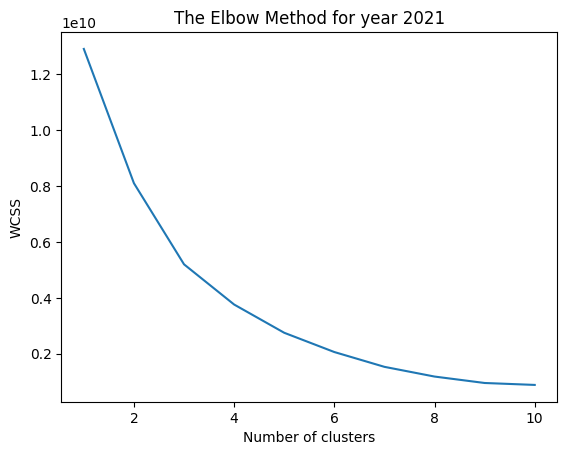

In [24]:
from sklearn.cluster import KMeans
for name, group in scaled_groups.items():
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(group)
        wcss.append(kmeans.inertia_)



    plt.plot(range(1, 11), wcss)
    plt.title(f'The Elbow Method for year {name}')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

In [25]:
clusters_map = {2019: 5, 2020: 4, 2021: 4}

for name, group in scaled_groups.items():
    num_clusters = clusters_map[name] 
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(group[columns_to_scale])

    group['cluster'] = y_kmeans

    scaled_groups[name] = group


In [26]:
data = pd.concat(scaled_groups.values(), axis=0)
data

,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,...,trip_time,store_and_fwd_flag,RatecodeID,PULocationID,year,month,VendorID,day,DOLocationID,cluster
0,1.369296,2.332504,-0.574009,1.149919,-0.560178,0.0,-0.075082,0.0,7.216450e-16,0.995266,...,0.232127,0.0,1.0,141,2019,10,2.0,11,158,4
1,1.369296,-0.670114,-0.574009,-0.858486,-0.560178,0.0,0.202804,0.0,7.216450e-16,-0.609054,...,-0.776052,0.0,1.0,48,2019,10,2.0,11,50,1
2,-0.421676,1.123258,-0.574009,1.867206,-0.958696,0.0,1.592234,0.0,7.216450e-16,2.000382,...,2.111681,0.0,1.0,249,2019,10,2.0,10,232,4
3,1.369296,-1.172259,1.675972,-1.288859,-0.958696,0.0,-1.310131,0.0,7.216450e-16,-1.565847,...,-1.132929,0.0,1.0,161,2019,10,2.0,11,161,2
4,-0.421676,-0.875071,1.675972,-0.428114,-0.958696,0.0,-1.310131,0.0,7.216450e-16,-0.841003,...,-0.169360,0.0,1.0,234,2019,10,2.0,10,249,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439180,-0.361533,0.646525,-0.542339,0.427844,-0.896755,0.0,0.713413,0.0,7.771561e-16,0.519474,...,-0.144702,0.0,1.0,13,2021,4,2.0,14,246,0
1439181,-0.361533,-0.661957,1.760627,-0.302875,-0.896755,0.0,-1.341129,0.0,7.771561e-16,-0.752683,...,0.014671,0.0,1.0,234,2021,4,2.0,14,137,2
1439182,-0.361533,1.137206,-0.542339,0.427844,-0.102768,0.0,0.867890,0.0,7.771561e-16,0.815324,...,-0.304075,0.0,1.0,229,2021,5,2.0,27,233,3
1439183,-0.361533,0.492586,1.760627,0.573988,-0.102768,0.0,-1.341129,0.0,7.771561e-16,0.233485,...,0.564000,0.0,1.0,48,2021,5,2.0,27,238,2


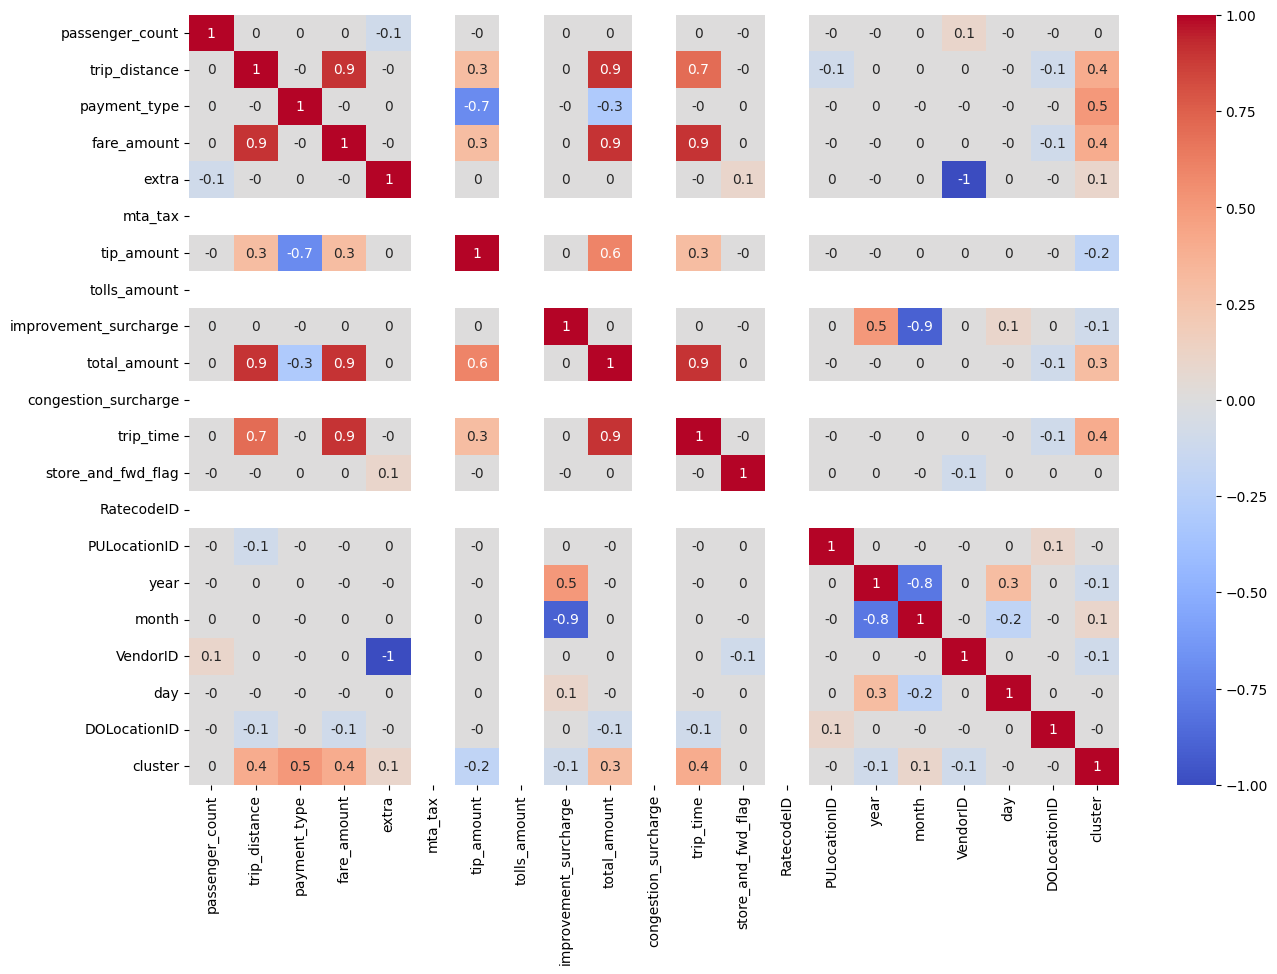

In [27]:
plt.figure(figsize=(15, 10))
correlation = round(data.corr(), 1)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [30]:
need_columns = ['trip_distance', 'payment_type', 'fare_amount','extra',
                'tip_amount', 'improvement_surcharge','total_amount',
                'trip_time', 'year','month', 'VendorID', 'cluster']
df = data[need_columns]
df

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,year,month,VendorID,cluster
0,2.332504,-0.574009,1.149919,-0.560178,-0.075082,7.216450e-16,0.995266,0.232127,2019,10,2.0,4
1,-0.670114,-0.574009,-0.858486,-0.560178,0.202804,7.216450e-16,-0.609054,-0.776052,2019,10,2.0,1
2,1.123258,-0.574009,1.867206,-0.958696,1.592234,7.216450e-16,2.000382,2.111681,2019,10,2.0,4
3,-1.172259,1.675972,-1.288859,-0.958696,-1.310131,7.216450e-16,-1.565847,-1.132929,2019,10,2.0,2
4,-0.875071,1.675972,-0.428114,-0.958696,-1.310131,7.216450e-16,-0.841003,-0.169360,2019,10,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1439180,0.646525,-0.542339,0.427844,-0.896755,0.713413,7.771561e-16,0.519474,-0.144702,2021,4,2.0,0
1439181,-0.661957,1.760627,-0.302875,-0.896755,-1.341129,7.771561e-16,-0.752683,0.014671,2021,4,2.0,2
1439182,1.137206,-0.542339,0.427844,-0.102768,0.867890,7.771561e-16,0.815324,-0.304075,2021,5,2.0,3
1439183,0.492586,1.760627,0.573988,-0.102768,-1.341129,7.771561e-16,0.233485,0.564000,2021,5,2.0,2


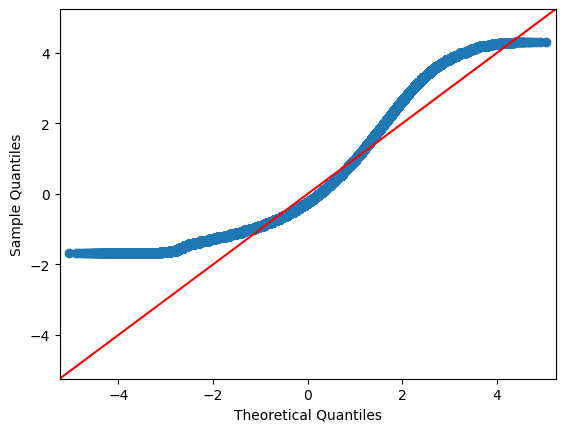

In [32]:
from statsmodels.graphics.gofplots import qqplot

qqplot(df['trip_distance'], fit=True,line="45")
plt.show()

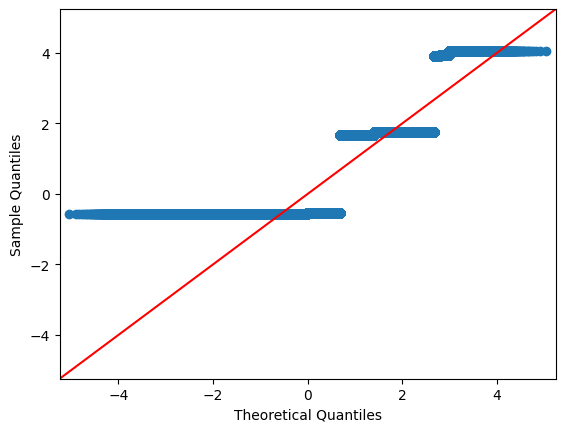

In [33]:
qqplot(df['payment_type'], fit=True,line="45")
plt.show()

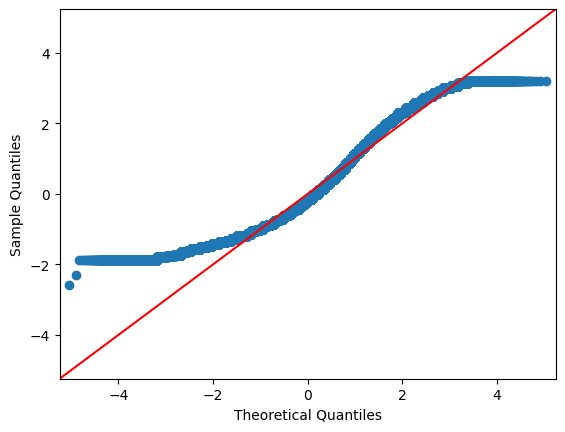

In [34]:
qqplot(df['fare_amount'], fit=True,line="45")
plt.show()

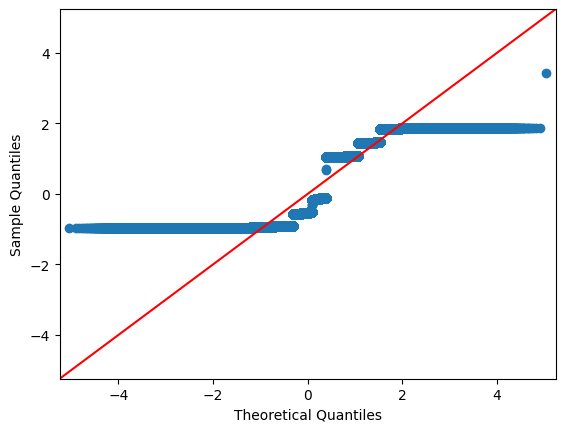

In [35]:
qqplot(df['extra'], fit=True,line="45")
plt.show()

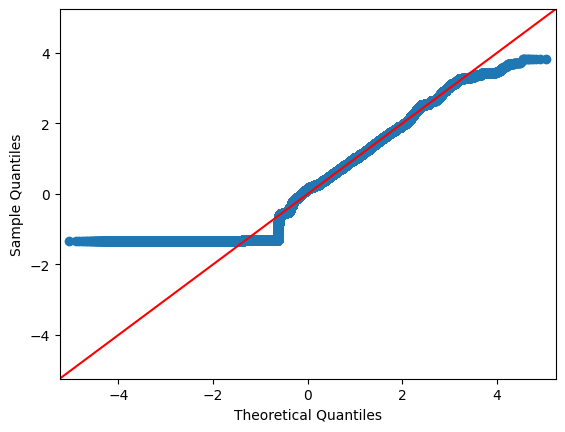

In [36]:
qqplot(df['tip_amount'], fit=True,line="45")
plt.show()

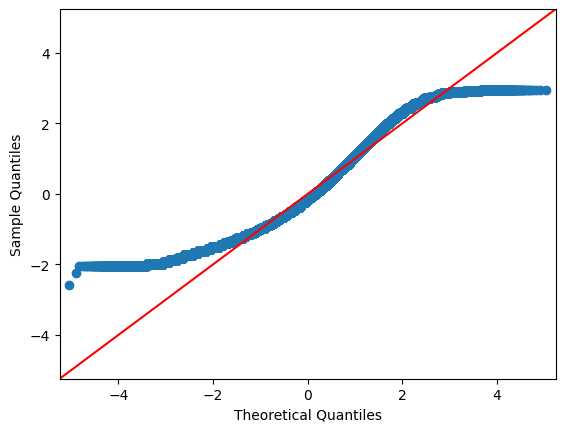

In [37]:
qqplot(df['total_amount'], fit=True,line="45")
plt.show()

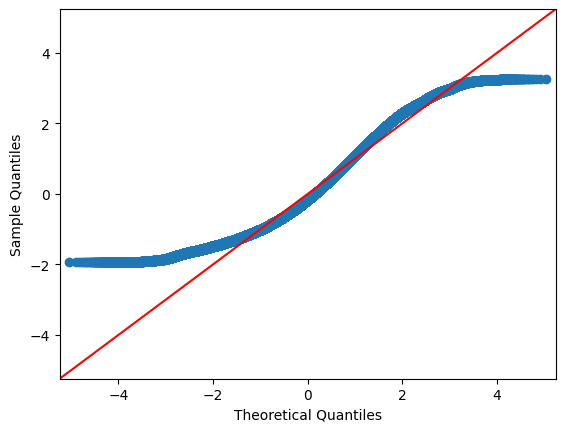

In [38]:
qqplot(df['trip_time'], fit=True,line="45")
plt.show()

In [39]:
balanced_df

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day,trip_time
1403068,1403068,1.0,1.0,2.30,1.0,0.0,263,74,1.0,8.5,...,0.5,1.85,0.0,0.3,14.15,2.5,2020,1,8,6.866667
888333,888333,1.0,1.0,1.30,1.0,0.0,140,162,1.0,7.5,...,0.5,2.15,0.0,0.3,12.95,2.5,2020,1,6,8.383333
451187,451187,1.0,0.0,1.20,1.0,0.0,163,141,1.0,6.0,...,0.5,1.95,0.0,0.3,11.75,2.5,2021,1,12,4.700000
2829057,2829057,2.0,2.0,1.04,1.0,0.0,237,161,1.0,7.5,...,0.5,1.00,0.0,0.3,11.80,2.5,2020,1,15,9.283333
3834948,3834948,1.0,2.0,1.80,1.0,1.0,236,161,2.0,9.0,...,0.5,0.00,0.0,0.3,12.30,2.5,2020,1,20,10.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303354,303354,2.0,1.0,0.93,1.0,0.0,161,163,1.0,9.0,...,0.5,3.69,0.0,0.3,15.99,2.5,2019,12,15,12.850000
312003,312003,2.0,1.0,1.18,1.0,0.0,230,162,1.0,12.5,...,0.5,3.16,0.0,0.3,18.96,2.5,2019,12,15,18.783333
2908448,2908448,2.0,1.0,0.99,1.0,0.0,262,140,1.0,7.0,...,0.5,2.00,0.0,0.3,12.30,2.5,2019,12,5,8.966667
3011096,3011096,2.0,1.0,2.83,1.0,0.0,234,237,1.0,13.0,...,0.5,3.36,0.0,0.3,20.16,2.5,2019,12,26,16.283333


In [ ]:
for year, group in balanced_df.groupby('year'):
    filtered1 = group.loc[(group['fare_amount'] / group['tip_amount'] >= 0.15) & (group['trip_distance'] <= 2)]
    filtered1.PULocationID.value_counts()
    top_locations = filtered1['PULocationID'].value_counts().head(3)

    print(f"\nYear: {year}")
    print("Top 3 PULocationID:")
    print(top_locations.to_string())



Year: 2019
Top 3 PULocationID:
PULocationID
237    66712
236    55011
161    48224

Year: 2020
Top 3 PULocationID:
PULocationID
237    63749
236    55938
161    50772

Year: 2021
Top 3 PULocationID:
PULocationID
237    73632
236    70811
141    41984


In [46]:
filtered_by_year2 = {}
for year, group in balanced_df.groupby('year'):
    group['cost_per_km'] = (group['fare_amount'] / group['trip_distance'])
    mean_cost_per_km = group.groupby('RatecodeID')['cost_per_km'].transform('mean')
    filtered2 = group[group['cost_per_km'] <= mean_cost_per_km]
    filtered_by_year2[year] = filtered2
    
    print(f"\nYear: {year}")
    print("Filtered data (first 5 rows):")
    print(filtered2.head(3).to_string(index=False))


Year: 2019
Filtered data (first 5 rows):
 Unnamed: 0  VendorID  passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  year  month  day  trip_time  cost_per_km
     252482       2.0              2.0           3.87         1.0                 0.0           141           158           1.0         13.0    0.5      0.5        1.60           0.0                    0.3         18.40                   2.5  2019     10   11  12.150000     3.359173
     287350       2.0              2.0           0.94         1.0                 0.0            48            50           1.0          6.0    0.5      0.5        1.96           0.0                    0.3         11.76                   2.5  2019     10   11   6.500000     6.382979
     132965       2.0              1.0           2.69         1.0                 0.0           249       

In [51]:
for year, group in balanced_df.groupby('year'):
    print(year, group.groupby(['RatecodeID']).mean().passenger_count)

2019 RatecodeID
1.0    1.235445
Name: passenger_count, dtype: float64
2020 RatecodeID
1.0    1.235633
Name: passenger_count, dtype: float64
2021 RatecodeID
1.0    1.187353
Name: passenger_count, dtype: float64


In [52]:
df.to_csv('df.csv')